### Data Description


*Research question*

We are studying projects on the platform gofundme and the diverse factors that lead a project to be found. In our data set, we have extract the name, the date of the project, the description, the category, the pourcentage raised, the number of donors etc… 

Here are the questions we want to answer : 
- Does the category have an influence on the founding ? 
- Does the  pourcentage raised intuitively increase with time ? 
- Do Keywords in the description make a project more attractive ? 
- Does the donation per user influence the foundation ?


### Useful imports 


In [240]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib as mpl

pd.options.display.max_columns = 500

# CLEANING THE DATAFRAME SCRAPED

In [241]:
df=pd.read_csv('DataFinalfromWebScraping2.csv')

### II.1/We transform Creation Date to a datetime </b>

For this we will tokenize the str sentence Creation Date, create a dictionary for month and transform Created 2 days ago in 2022-01-14 for example with the function Convertdate. 

Then, we transform it in a proper DateTime

In [242]:
from datetime import date

#We use nltk to tokenize the str of Creation Date
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/albandhauthuille/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [243]:
def monthToNum(shortMonth):
    return {
            'January': 1,
            'February': 2,
            'March': 3,
            'April': 4,
            'May': 5,
            'June': 6,
            'July': 7,
            'August': 8,
            'September': 9, 
            'October': 10,
            'November': 11,
            'December': 12
    }[shortMonth]

In [244]:
def Convertdate():

    new_Date=[]
    #print(new_Date)
    for i in range (df['Creation Date'].size):
        #print(i)
        Creation_date = word_tokenize(df['Creation Date'][i])
        #print(Creation_date)
        
        if 'now'in Creation_date or 'hours' in Creation_date:
            new_Date.append(str(str(2022)+'-'+'01'+'-'+str(24)))
        elif 'ago' not in Creation_date: 
            #print('no')
            new_Date.append(str(Creation_date[4])+'-'+str(monthToNum(Creation_date[1]))+'-'+str(Creation_date[2]))
        
            
        elif 'ago' in Creation_date: 
            new_Date.append(str(str(2022)+'-'+'01'+'-'+str(24-int(Creation_date[1]))))
    return new_Date

In [245]:
df['Creation Date']=Convertdate()

In [246]:
pd.to_datetime(df['Creation Date'])
df['Creation Date']=pd.to_datetime(df['Creation Date'])


### II.2/ Retiring the '%' of Pourcentage Raised to plot properly

In [247]:
pd.options.mode.chained_assignment = None  # default='warn'
for i in range(len(df['Pourcentage Raised'])):
    df['Pourcentage Raised'][i]=df['Pourcentage Raised'][i][:-1]

In [248]:
#For example:
df['Pourcentage Raised'][4]

'48.9'

### II.3/ Convert to proper type

In [249]:
df=df.convert_dtypes()


In [250]:
df['Pourcentage Raised']=df['Pourcentage Raised'].astype(float)

### II.4/ Duration of a collect with 'Creation Date'


In [251]:
Duration =[]
for i in range(len(df['Creation Date'])):
    Duration.append((pd.Timestamp.today()-df['Creation Date'][i]).days)
df["Duration in days"]=Duration

### II.5/ We only study the keywords, we reduce the 'Description' to 'Short_description' with words of length >4

In [252]:
Short_description=[]
for i in range(len(df['Description'])):
    list=[]
    a=word_tokenize(df['Description'][i])
    for word in a:
        if len(word)>4:
            list.append(word)
    Short_description.append(list)

df['Short_description']=Short_description
#df

### II.6.1/ Creation of column 'Amount Collected'

In [253]:
Amount_Collected=[]
#print(df)
for i in range(len(df['collect'])):
    #word=(df['collect'][i])[1:]
    word=word_tokenize(df['collect'][i][1:])
    #If the amount is about millions:
    
    if 'M' in word[0]: 
        Amount_Collected.append(float(word[0].replace(',', '.')[:-1])*1000000)
    #print(word)
    else:
        if ',' in word[0]:
            Amount_Collected.append(float(word[0].replace(',', '.'))*1000)
        else:
            Amount_Collected.append(float(word[0].replace(',', '.')))
            
df['Amount collected ']=Amount_Collected

### II.6.2/ Creation of Column 'Amount targeted'

In [254]:
Amount_Targeted=[]
for i in range(len(df['collect'])):
    word=word_tokenize(df['collect'][i])
    #print(word)
    #If the amount is about millions:
    if 'M' in word[-1]: 
        Amount_Targeted.append(float(((word[-1].replace('M', '')).replace('€','')).replace('£',''))*1000000)
    #print(word)
    elif 'B' in word[-1]: 
        Amount_Targeted.append(float(((word[-1].replace('B', '')).replace('€','')).replace('£',''))*1000000000)
    else:
        if ',' in word[-1]:
            Amount_Targeted.append(float(((word[-1].replace(',', '.')).replace('€','')).replace('£',''))*1000)
        else:
            Amount_Targeted.append(float(((word[-1].replace(',', '.')).replace('€','')).replace('£','')))
            
#len(Amount_Targeted)
df['Amount targeted']=Amount_Targeted

### II.7/ MeanDonation

In [255]:
MeanDonation =[]
for i in range(len(df['NumberDonors'])):
    if df['NumberDonors'][i]>0:
        MeanDonation.append((df['Amount collected '][i])/(df['NumberDonors'][i]))
    else : MeanDonation.append(0)
df['MeanDonation']=MeanDonation


### II.8/ USELESS, WE WILL USE PD.DUMMY LATER Categories and conversion to numeric to plot and corr properly

In [256]:
catégorie = ["Medical, Illness & Healing", "Funerals & Memorials", "Accidents & Emergencies","Non-Profits & Charities","Education & Learning", "Animals & Pets", "Environment", "Business & Entrepreneurs","Community & Neighbors", "Competitions & Pageants","Creative Arts, Music & Film", "Celebrations & Events","Missions, Faith & Church", "Babies, Kids & Family", "Sports, Teams & Clubs", "Travel & Adventure","Volunteer & Service", "Dreams, Hopes & Wishes", "Other"]
#print(catégorie)

In [257]:
df['categoryNumeric'] = pd.factorize(df['Categorie'])[0] + 1
df['townNumeric'] = pd.factorize(df['town'])[0] + 1

### II.9/ Creation of a column  'Size', which is the amount targeted:
    

In [258]:
df.describe()

,Unnamed: 0,Pourcentage Raised,NumberDonors,Duration in days,Amount collected,Amount targeted,MeanDonation,categoryNumeric,townNumeric
count,1716.000000,1716.000000,1716.000000,1716.000000,1.716000e+03,1.716000e+03,1716.000000,1716.000000,1716.000000
mean,857.500000,21.832692,67.204545,55.474359,5.585660e+03,4.186040e+06,37.041797,9.488345,302.850233
std,495.510848,32.015606,599.646314,66.171206,6.057841e+04,6.220077e+07,74.725592,5.208021,274.721746
min,0.000000,1.000000,0.000000,7.000000,0.000000e+00,1.000000e+00,0.000000,1.000000,1.000000
25%,428.750000,1.000000,0.000000,13.000000,0.000000e+00,1.000000e+03,0.000000,5.000000,39.000000
50%,857.500000,2.900000,3.000000,35.000000,9.000000e+01,3.000000e+03,20.000000,9.000000,229.000000
75%,1286.250000,30.425000,17.000000,66.000000,7.100000e+02,1.000000e+04,46.570513,14.000000,523.000000
max,1715.000000,100.000000,15155.000000,362.000000,1.600000e+06,1.000000e+09,1677.666667,18.000000,896.000000


In [259]:
size=[]
for collect in df['Amount targeted']:
    if collect < 1000:
        size.append(1)
    elif collect <3000:
        size.append(2)
    elif collect <10000:
        size.append(3)
    elif collect<50000: 
        size.append(4)
    else:
        size.append(5)
    
df['size']=size


(-11.20262517464513,
 11.009648817840244,
 -11.192278294352544,
 11.100470177477085)

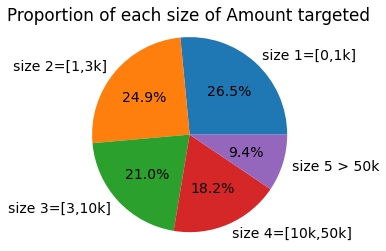

In [260]:
fig1, ax1 = plt.subplots()
mpl.rcParams['font.size'] = 14.0
ax1.pie(df["size"].value_counts(),radius = 10, labels = ["size 1=[0,1k]", "size 2=[1,3k]", "size 3=[3,10k]" ,"size 4=[10k,50k]",'size 5 > 50k'], autopct='%1.1f%%', textprops=dict(color="black"))
plt.title("Proportion of each size of Amount targeted", color="black")
ax1.axis('equal')



### II.10/ We drop useless columns

In [261]:
df.drop(['Unnamed: 0', 'title', 'collect','Description'], axis=1, inplace=True)
df.describe()

,Pourcentage Raised,NumberDonors,Duration in days,Amount collected,Amount targeted,MeanDonation,categoryNumeric,townNumeric,size
count,1716.000000,1716.000000,1716.000000,1.716000e+03,1.716000e+03,1716.000000,1716.000000,1716.000000,1716.000000
mean,21.832692,67.204545,55.474359,5.585660e+03,4.186040e+06,37.041797,9.488345,302.850233,2.685897
std,32.015606,599.646314,66.171206,6.057841e+04,6.220077e+07,74.725592,5.208021,274.721746,1.251401
min,1.000000,0.000000,7.000000,0.000000e+00,1.000000e+00,0.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,13.000000,0.000000e+00,1.000000e+03,0.000000,5.000000,39.000000,2.000000
50%,2.900000,3.000000,35.000000,9.000000e+01,3.000000e+03,20.000000,9.000000,229.000000,3.000000
75%,30.425000,17.000000,66.000000,7.100000e+02,1.000000e+04,46.570513,14.000000,523.000000,4.000000
max,100.000000,15155.000000,362.000000,1.600000e+06,1.000000e+09,1677.666667,18.000000,896.000000,5.000000


### II.11/ We drop the 5% highest values for each category which contains sometimes fake values 

In [262]:
df3=df.loc[df['Categorie']==catégorie[-1]]
df3=df3.loc[df3['Amount targeted']<df3['Amount targeted'].quantile(0.9)]

for i in range(len(catégorie)-1,-1,-1):
    df2=df.loc[df['Categorie']==catégorie[i]]

    #drop 4th quartile of highest values
    df2=df2.loc[df2['Amount targeted']<df2['Amount targeted'].quantile(0.9)]
    df3= pd.concat([df2,df3])
df=df3.reset_index(drop=True)


### II.12/ Export cleaned DF for Analyse 

In [263]:
df.to_csv('datacleaned.csv')
df.describe()


,Pourcentage Raised,NumberDonors,Duration in days,Amount collected,Amount targeted,MeanDonation,categoryNumeric,townNumeric,size
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,23.035583,23.693316,56.087156,1592.236566,6682.376147,35.685074,9.450197,298.156619,2.447575
std,32.735071,91.683341,66.161984,7128.795581,14134.901900,73.968712,5.203512,274.453665,1.098227
min,1.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,14.000000,0.000000,1000.000000,0.000000,5.000000,39.000000,2.000000
50%,4.100000,3.000000,36.000000,90.000000,2200.000000,20.000000,9.000000,222.500000,2.000000
75%,33.300000,15.750000,67.000000,655.000000,6000.000000,45.624041,14.000000,512.000000,3.000000
max,100.000000,1627.000000,362.000000,115666.000000,200000.000000,1677.666667,18.000000,896.000000,5.000000


In [264]:
df

,Categorie,town,Pourcentage Raised,Creation Date,NumberDonors,Duration in days,Short_description,Amount collected,Amount targeted,MeanDonation,categoryNumeric,townNumeric,size
0,"Medical, Illness & Healing",Vincennes,44.5,2022-01-18,100,13,"[connaissez, d'Instagram, cette, plateforme, d...",2225.0,5000.0,22.250000,1,1,3
1,"Medical, Illness & Healing",Paris,5.1,2022-01-23,29,8,"[Hellohope, doing, greati, Hossam, morocco, ye...",506.0,10000.0,17.448276,1,2,4
2,"Medical, Illness & Healing",Metz,100.0,2022-01-11,139,20,"[support, needed, years, coma.She, hospitalize...",6345.0,1.0,45.647482,1,3,1
3,"Medical, Illness & Healing",Évreux,48.9,2021-12-06,126,56,"[Chers, actuellement, visite, semaine, dernièr...",4889.0,10000.0,38.801587,1,5,4
4,"Medical, Illness & Healing",,100.0,2021-12-16,126,46,"[Bonjour, Notre, Andreas, atteint, sclérose, l...",20150.0,20000.0,159.920635,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,"Dreams, Hopes & Wishes",Sciecq,1.0,2022-01-22,0,9,"[Bonjour, m'appelle, Clément, recherche, matér...",0.0,100.0,0.000000,18,384,1
1522,"Dreams, Hopes & Wishes",La Chapelle-du-Noyer,1.0,2022-01-22,0,9,"[Rafale, zaaaaaaaaaaaahhhhhJe, c'est, prévu, v...",0.0,990.0,0.000000,18,894,1
1523,"Dreams, Hopes & Wishes",Gaillac-d'Aveyron,1.0,2022-01-21,0,10,"[Bonjour, m'appelle, trottein, marine, souhait...",0.0,3000.0,0.000000,18,895,3
1524,"Dreams, Hopes & Wishes",Le Bignon,1.0,2022-01-20,0,11,"[Bonjour, m'appelle, Margot, demande, assez, s...",0.0,500.0,0.000000,18,896,1
